In [ ]:
import main as app
import pandas as pd
import matplotlib.pyplot as plt


df = app.df
df = df[df["name"].isin(["Chambre A&M", "Chambre Lucas", "Extérieur", "Salon"])]

# Convert timestamp to datetime and Paris timezone
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")
df["timestamp"] = df["timestamp"].dt.tz_localize("UTC").dt.tz_convert("Europe/Paris")

# df = df[df["name"].isin(["Chambre A&M", "Chambre Lucas", "Salon"])]

now = pd.Timestamp.now()
now_minus_minutes = now - pd.Timedelta(minutes=10)
now_minus_hours = now - pd.Timedelta(hours=1)
now_minus_days = now - pd.Timedelta(days=7)


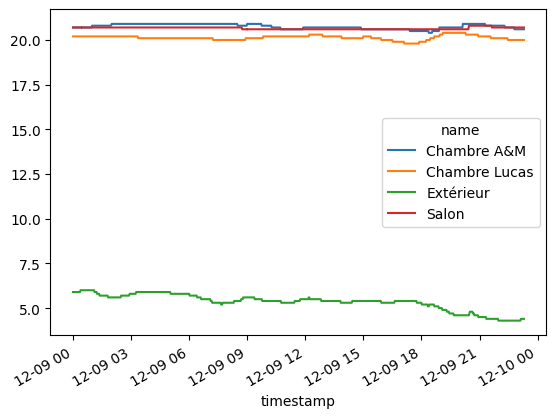

In [38]:
# Filter 'timestamp' between 2024-12-09 00:00:00 and 2024-12-09 23:59:59
df_today = df[(df['timestamp'] >= '2024-12-09 00:00:00') & (df['timestamp'] <= '2024-12-09 23:59:59')]

ax = df_today.pivot(index='timestamp', columns='name', values='temperature').plot()

In [39]:
# Temperatures within the last minutes
df_last_minutes = df[(df['timestamp'] >= now_minus_minutes) & (df['timestamp'] <= now)]

# Temperatures within the last hour
df_last_hour = df[(df['timestamp'] >= now_minus_days) & (df['timestamp'] <= now)]

# Temperatures within the last week
df_last_week = df[(df['timestamp'] >= now_minus_days) & (df['timestamp'] <= now)]

In [40]:
pd.set_option('display.max_rows', None)
print(df_last_minutes)

Empty DataFrame
Columns: [timestamp, temperature, humidity, name]
Index: []


In [41]:
# Minimum temperature within the last hour for each room
min_temp_last_hour = df_last_hour.groupby('name')['temperature'].min()
print(min_temp_last_hour)

name
Chambre A&M      6.2
Chambre Lucas    6.2
Extérieur       -0.3
Salon            6.2
Name: temperature, dtype: float64


            name  min   max
0    Chambre A&M  6.2  23.1
1  Chambre Lucas  6.2  23.1
2      Extérieur -0.3  23.1
3          Salon  6.2  23.1


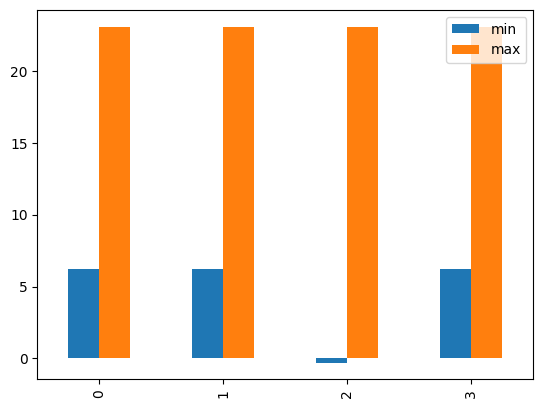

In [42]:
# Min and max temperatures within the last hour for each room
min_max = df.groupby('name')['temperature'].agg(['min', 'max']).reset_index()
min_max.plot(kind='bar')
print(min_max)

<Axes: >

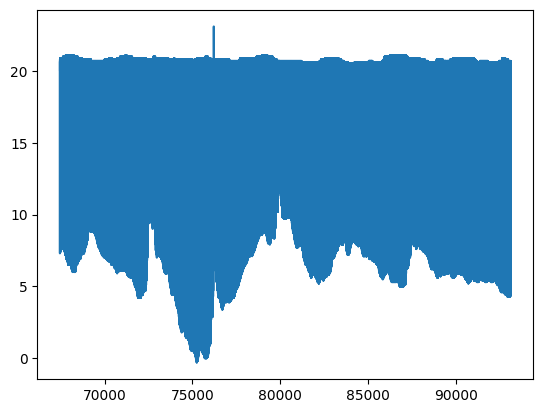

In [43]:
# Has the temperature been stable in the last hour?
df_last_hour['temperature'].plot()

In [44]:
# Temperatures within the last week
df_last_week = df[(df['timestamp'] >= now_minus_days) & (df['timestamp'] <= now)]
df_last_week.groupby([df_last_week['timestamp'].dt.date, 'name']).mean()

timestamp  temperature   humidity
timestamp  name                                                               
2024-12-03 Chambre A&M   2024-12-03 12:22:31.815601664    20.865329  51.675585
           Chambre Lucas 2024-12-03 12:21:30.747558144    20.172525  50.528365
           Extérieur     2024-12-03 12:20:48.084768000     7.158463  85.144766
           Salon         2024-12-03 12:21:23.496001280    20.635746  49.092428
2024-12-04 Chambre A&M   2024-12-04 12:00:11.541106176    20.702592  50.438445
           Chambre Lucas 2024-12-04 11:59:55.347619072    20.256203  48.755124
           Extérieur     2024-12-04 11:59:20.351211008     5.657451  82.428726
           Salon         2024-12-04 11:59:55.347619072    20.826969  46.571737
2024-12-05 Chambre A&M   2024-12-05 12:03:34.062229760    20.659868  48.136714
           Chambre Lucas 2024-12-05 12:03:33.853039360    20.114112  46.099228
           Extérieur     2024-12-05 12:03:07.680047872     3.577373  85.082781
           Salon         2024-12-05 12:04:27.431565056    20.657127  42.867403
2024-12-06 Chambre A&M   2024-12-06 12:00:26.240161792    20.644779  49.249731
           Chambre Lucas 2024-12-06 12:00:26.240161792    20.299031  47.839612
           Extérieur     2024-12-06 12:00:26.240161792     8.371044  73.855759
           Salon         2024-12-06 12:00:26.240161792    20.685145  44.170075
2024-12-07 Chambre A&M   2024-12-07 11:58:10.007915776    20.631061  50.247835
           Chambre Lucas 2024-12-07 11:56:21.979880704    20.326413  48.476087
           Extérieur     2024-12-07 11:58:10.007915776     6.988528  81.593074
           Salon         2024-12-07 11:58:31.153723136    20.559243  49.334054
2024-12-08 Chambre A&M   2024-12-08 12:00:17.330715392    20.855459  49.137297
           Chambre Lucas 2024-12-08 12:00:05.579395072    20.455195  48.271645
           Extérieur     2024-12-08 12:00:29.257666560     6.333693  81.021598
           Salon         2024-12-08 12:00:29.257666560    20.577970  46.349892
2024-12-09 Chambre A&M   2024-12-09 11:39:00.497882368    20.753437  48.982262
           Chambre Lucas 2024-12-09 11:39:00.497882368    20.130266  46.192905
           Extérieur     2024-12-09 11:39:00.497882368     5.341796  79.746120
           Salon         2024-12-09 11:39:55.914420736    20.654889  47.984444